Burada bir önceki çalışma döndürme gibi işlemlere tabi tutulmuş çoklu resim için tekrarlanmıştır.

In [1]:
# https://www.youtube.com/watch?v=Te3YieMUYd8


"""
@author: Sreenivas Bhattiprolu
Good example to demo image reconstruction using autoencoders
Try different optimizers and loss
To launch tensorboard type this in the console: !tensorboard --logdir=logs/ --host localhost --port 8088
then go to: http://localhost:8088/
"""

'\n@author: Sreenivas Bhattiprolu\nGood example to demo image reconstruction using autoencoders\nTry different optimizers and loss\nTo launch tensorboard type this in the console: !tensorboard --logdir=logs/ --host localhost --port 8088\nthen go to: http://localhost:8088/\n'

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from tqdm import tqdm
import time
import tensorflow as tf



In [3]:

SIZE=256
img_data=[]
path1 = 'drive/MyDrive/Colab Notebooks/ImageProcessing/AutoEncoders/einstein_mona_lisa/einstein'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img_data.append(img_to_array(img))
    

img2_data=[]
path2 = 'drive/MyDrive/Colab Notebooks/ImageProcessing/AutoEncoders/einstein_mona_lisa/monalisa'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img2_data.append(img_to_array(img))

100%|██████████| 11/11 [00:02<00:00,  4.15it/s]


In [4]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

img_array2 = np.reshape(img2_data, (len(img2_data), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

In [5]:
#Original einstein image for prediction as monalisa
img_data3=[]

img3=cv2.imread('drive/MyDrive/Colab Notebooks/ImageProcessing/AutoEncoders/einstein_mona_lisa/einstein_original.jpg', 1)   #Change 0 to 1 for color images
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img3=cv2.resize(img3,(SIZE, SIZE))
img_data3.append(img_to_array(img3))

img_array3 = np.reshape(img_data3, (len(img_data3), SIZE, SIZE, 3))
img_array3 = img_array3.astype('float32') / 255.

start=time.time()

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [8]:

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]


model.fit(img_array, img_array2,
        epochs=500,
        shuffle=True,
        callbacks=callbacks)

finish=time.time()
print('total_time = ', finish-start)

model.save('einstein_autoencoder.model')

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.1067 - accuracy: 0.2591
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 0.0926 - accuracy: 0.2627
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 0.0780 - accuracy: 0.2670
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.0703 - accuracy: 0.2752
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.0757 - accuracy: 0.5141
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 0.0748 - accuracy: 0.5476
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 0.0692 - accuracy: 0.5489
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.0653 - accuracy: 0.5489
Epoch 9/500
1/1 [==============================] - 2s 2s/step - loss: 0.0624 - accuracy: 0.5484
Epoch 10/500
1/1 [==============================] - 2s 2s/step - loss: 0.0595 - accuracy: 0.5456
Epoch 11/500
1/1 [=====================

Output


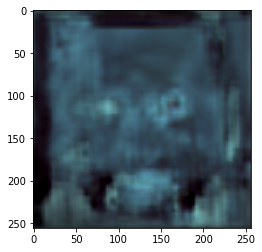

In [9]:
print("Output")
pred = model.predict(img_array3)



imshow(pred[0].reshape(SIZE,SIZE,3))